In [5]:
 
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import netron
import os
os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"
 

In [6]:
path = Path('data/')
 

In [7]:
data = (ImageList.from_folder(path)
       .split_by_rand_pct()
        .label_from_folder()
        .transform(get_transforms(),size = 64)
       ).databunch(bs = 64).normalize(imagenet_stats)
 

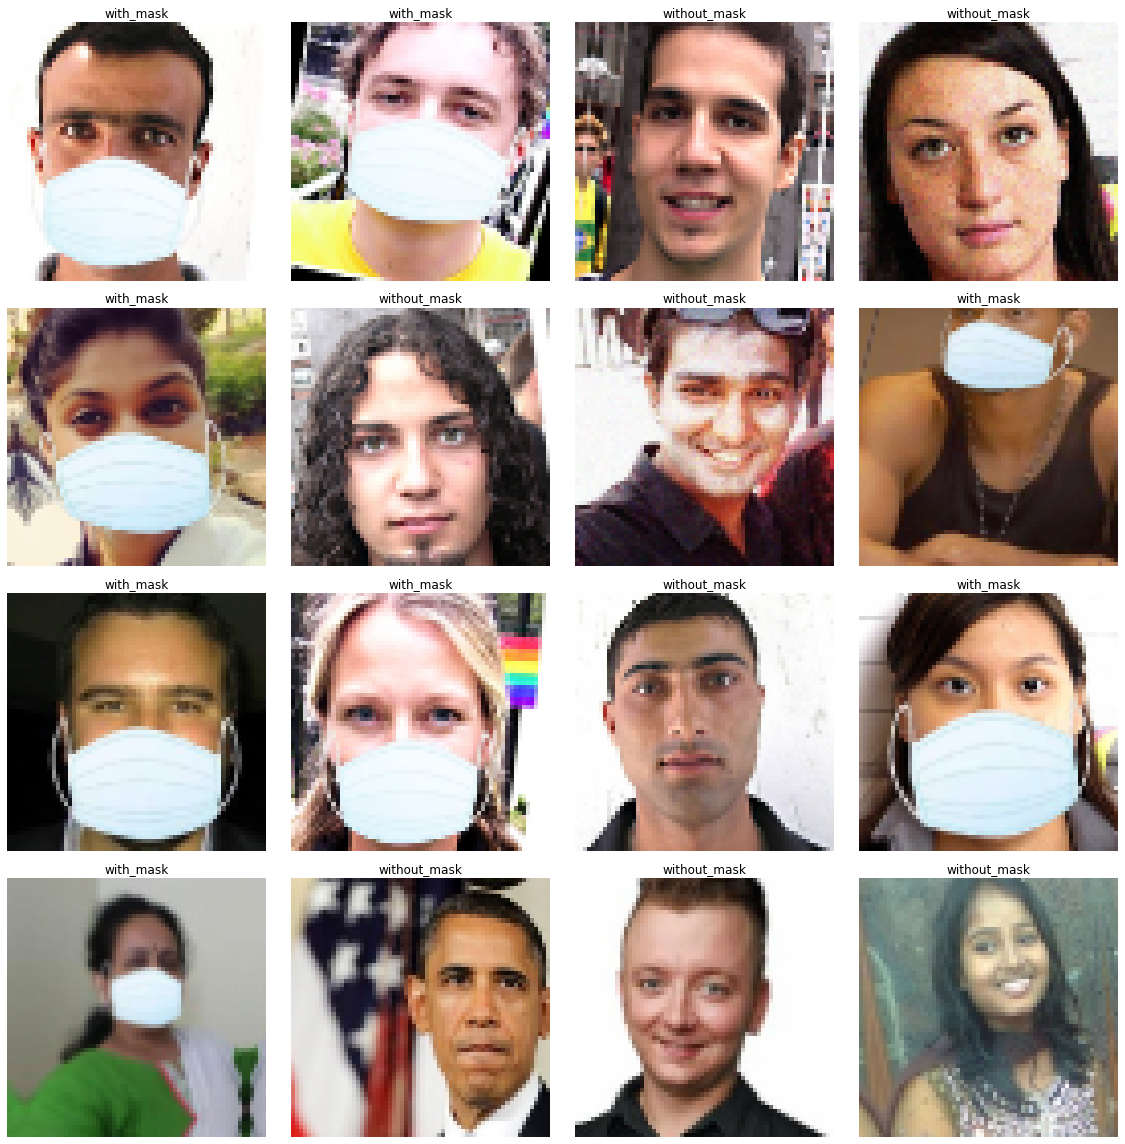

In [8]:
data.show_batch(4)
 

In [9]:
data.c
 

2

In [11]:
learn = None
gc.collect()

74853

## Dropout resnet50

In [12]:
learn = cnn_learner(
    data, models.resnet50, metrics=[accuracy], opt_func=AdamW, callback_fns=ShowGraph
)
 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


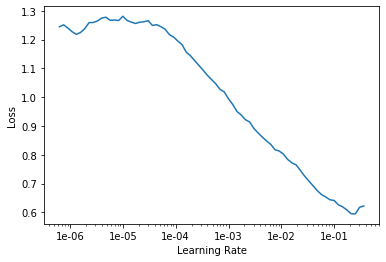

In [13]:
learn.lr_find()
learn.recorder.plot()
 

epoch,train_loss,valid_loss,accuracy,time
0,1.072037,0.287049,0.880000,00:14
1,0.715357,0.233723,0.905455,00:13
2,0.540719,0.161307,0.938182,00:14
3,0.441012,0.149361,0.945455,00:14
4,0.389848,0.135823,0.945455,00:14


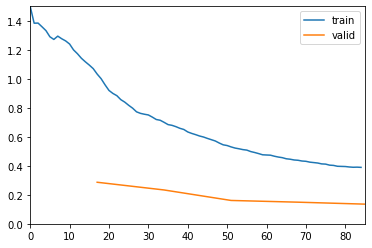

In [14]:
learn.fit_one_cycle(5, 3e-4,wd=10e-4)
 

epoch,train_loss,valid_loss,accuracy,time
0,0.195054,0.074880,0.967273,00:19
1,0.127339,0.022975,0.996364,00:20
2,0.121699,0.014947,0.992727,00:20
3,0.100792,0.018931,0.992727,00:20
4,0.075236,0.009416,0.992727,00:20


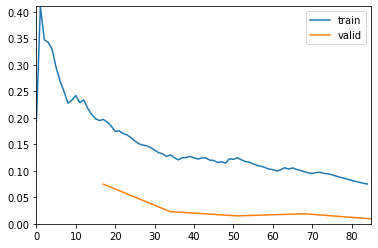

In [15]:
learn.unfreeze()
learn.fit_one_cycle(5, 3e-4,wd=10e-4)
 

## No dropout

In [16]:
learn = None
gc.collect()

16489

In [17]:
learn = cnn_learner(
    data, models.resnet50, metrics=[accuracy], opt_func=AdamW, callback_fns=ShowGraph
)
 

epoch,train_loss,valid_loss,accuracy,time
0,1.112804,0.275132,0.905455,00:14
1,0.732353,0.188709,0.927273,00:13
2,0.556087,0.166889,0.930909,00:14
3,0.438129,0.138621,0.945455,00:14
4,0.372222,0.131660,0.949091,00:14


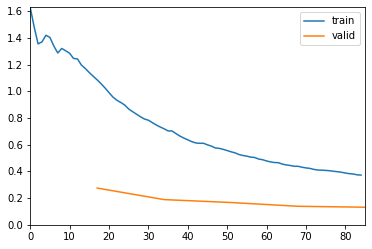

In [19]:
learn.fit_one_cycle(5, 3e-4)
 

epoch,train_loss,valid_loss,accuracy,time
0,0.214606,0.039295,0.992727,00:20
1,0.135029,0.096503,0.985455,00:20
2,0.096747,0.089612,0.985455,00:20


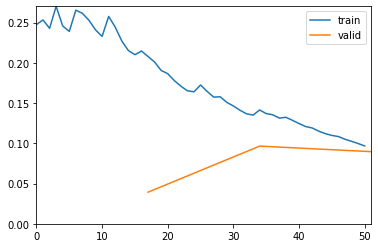

In [20]:
learn.unfreeze()
learn.fit_one_cycle(3, 3e-4)
 

# vgg16

In [16]:
learn = None
gc.collect()

16489

In [21]:
learn = cnn_learner(
    data, models.vgg16_bn, metrics=[accuracy], opt_func=AdamW, callback_fns=ShowGraph
)
 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


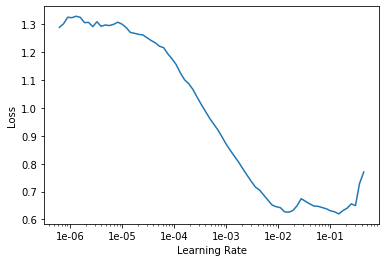

In [22]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
 

epoch,train_loss,valid_loss,accuracy,time
0,0.895043,0.153996,0.945455,00:28
1,0.455900,0.029799,0.992727,00:32
2,0.266901,0.006719,0.996364,00:32
3,0.171690,0.015479,0.992727,00:31
4,0.119888,0.016551,0.992727,00:31


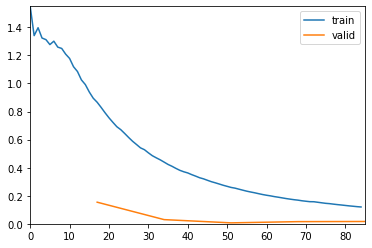

In [23]:
learn.unfreeze()
learn.fit_one_cycle(5, 3e-4,wd = 10e-4)
 